<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Desafios-DNC/blob/main/Desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

# 01 - Lendo o arquivo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data - data (2).csv.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
251383,559052,23227,FILIGREE HEART BUTTERFLY WHITE,1,7/5/2011 16:53,2.46,NaN,United Kingdom
251384,559052,23238,SET OF 4 KNICK KNACK TINS LONDON,1,7/5/2011 16:53,8.29,NaN,United Kingdom
251385,559052,23245,SET OF 3 REGENCY CAKE TINS,1,7/5/2011 16:53,10.79,NaN,United Kingdom
251386,559052,23250,VINTAGE RED TRIM ENAMEL BOWL,1,7/5/2011 16:53,2.46,NaN,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,251388.000000,251387.000000,180138.000000
mean,9.301796,5.070298,15285.006423
std,218.119946,117.298214,1727.099587
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13854.000000
50%,3.000000,2.100000,15150.000000
75%,10.000000,4.150000,16834.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251388 entries, 0 to 251387
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    251388 non-null  object 
 1   StockCode    251388 non-null  object 
 2   Description  250451 non-null  object 
 3   Quantity     251388 non-null  int64  
 4   InvoiceDate  251387 non-null  object 
 5   UnitPrice    251387 non-null  float64
 6   CustomerID   180138 non-null  float64
 7   Country      251387 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.3+ MB


In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 02 - Valores faltantes na identificação do cliente

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,937
Quantity,0
InvoiceDate,1
UnitPrice,1
CustomerID,71250
Country,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# 03 - Preços unitários e quantidade de produtos iguais ou inferior a 0

In [ ]:
# Verificando preços nulos
preços_nulos = df[df['UnitPrice'].isnull()]
print(preços_nulos)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
# Verificando preços menores ou iguais a zero
preços_igual_maior = df[df['UnitPrice'] <= 0]
print(preços_igual_maior)


       InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168         ORGANISER WOOD ANTIQUE WHITE         1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   

In [ ]:
# Filtre o dataset apenas para conter preços acima de zero

df_filtrado = df[df['UnitPrice'] > 0]
df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
250774,559050,23119,PACK OF 6 LARGE FRUIT STRAWS,288,7/5/2011 16:08,0.53,13694.0,United Kingdom
250775,559050,23302,KNEELING MAT HOUSEWORK DESIGN,48,7/5/2011 16:08,1.45,13694.0,United Kingdom
250776,559050,23309,SET OF 60 I LOVE LONDON CAKE CASES,120,7/5/2011 16:08,0.42,13694.0,United Kingdom
250777,559050,21395,BLUE POLKADOT BEAKER,48,7/5/2011 16:08,0.39,13694.0,United Kingdom


In [ ]:
# Verificando quantidades nulas
quantidades_nulas = df_filtrado[df_filtrado['Quantity'].isnull()]
print(quantidades_nulas)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
# Verificando quantidades menores ou iguais a zero
quantidades_igual_menor = df_filtrado[df_filtrado['Quantity'] <= 0]
print(quantidades_igual_menor)

       InvoiceNo StockCode                          Description  Quantity  \
141      C536379         D                             Discount        -1   
154      C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556        PLASTERS IN TIN CIRCUS PARADE       -12   
236      C536391     21984      PACK OF 12 PINK PAISLEY TISSUES       -24   
237      C536391     21983      PACK OF 12 BLUE PAISLEY TISSUES       -24   
...          ...       ...                                  ...       ...   
250430   C559030     21794  CLASSIC FRENCH STYLE BASKET NATURAL        -2   
250431   C559030     20984            12 PENCILS TALL TUBE POSY       -24   
250468   C559031     82580                  BATHROOM METAL SIGN      -250   
250469   C559033     22760               TRAY, BREAKFAST IN BED        -1   
250771   C559049     23079              TOADSTOOL BEDSIDE LIGHT        -2   

            InvoiceDate  UnitPrice  CustomerID         Country  
141     12

In [ ]:
# Filtrando Dataset apenas para conter quantidades acima de zero
df_filtrado = df_filtrado[df_filtrado['Quantity'] > 0]
df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
250774,559050,23119,PACK OF 6 LARGE FRUIT STRAWS,288,7/5/2011 16:08,0.53,13694.0,United Kingdom
250775,559050,23302,KNEELING MAT HOUSEWORK DESIGN,48,7/5/2011 16:08,1.45,13694.0,United Kingdom
250776,559050,23309,SET OF 60 I LOVE LONDON CAKE CASES,120,7/5/2011 16:08,0.42,13694.0,United Kingdom
250777,559050,21395,BLUE POLKADOT BEAKER,48,7/5/2011 16:08,0.39,13694.0,United Kingdom


# 04 - Verifique se existem linhas duplicadas


In [ ]:
df.duplicated().sum().any()

True

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum().any()

False

# 05 - Tipos de dados da coluna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178102 entries, 0 to 250778
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    178102 non-null  object 
 1   StockCode    178102 non-null  object 
 2   Description  178102 non-null  object 
 3   Quantity     178102 non-null  int64  
 4   InvoiceDate  178102 non-null  object 
 5   UnitPrice    178102 non-null  float64
 6   CustomerID   178102 non-null  float64
 7   Country      178102 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.2+ MB


In [ ]:
# Corrija o tipo de dado do CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df_filtrado['InvoiceDate'] = pd.to_datetime(df_filtrado['InvoiceDate'])

<ipython-input-135-dd55a8b867c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['InvoiceDate'] = pd.to_datetime(df_filtrado['InvoiceDate'])


In [ ]:
#tirar o horario do InvoiceDate, só manter a data padrao internacional

df_filtrado['InvoiceDate'] = df_filtrado['InvoiceDate'].dt.strftime('%Y-%m-%d')
df_filtrado

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178102 entries, 0 to 250778
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    178102 non-null  object        
 1   StockCode    178102 non-null  object        
 2   Description  178102 non-null  object        
 3   Quantity     178102 non-null  int64         
 4   InvoiceDate  178102 non-null  datetime64[ns]
 5   UnitPrice    178102 non-null  float64       
 6   CustomerID   178102 non-null  int64         
 7   Country      178102 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 16.3+ MB


In [ ]:
# Corrija o tipo de dado da InvoiceDate
df_filtrado['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175795 entries, 0 to 250778
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    175795 non-null  object        
 1   StockCode    175795 non-null  object        
 2   Description  175795 non-null  object        
 3   Quantity     175795 non-null  int64         
 4   InvoiceDate  173776 non-null  datetime64[ns]
 5   UnitPrice    175795 non-null  float64       
 6   CustomerID   175795 non-null  float64       
 7   Country      175795 non-null  object        
 8   TotalPreço   175795 non-null  float64       
 9   Month        175795 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 14.8+ MB


<ipython-input-182-af2745171a0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Tratando os outliers


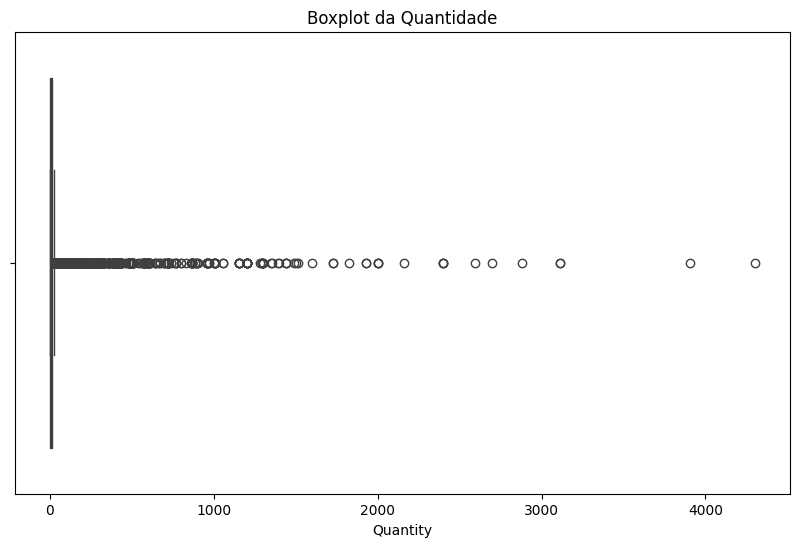

In [ ]:
# Visualizando

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['Quantity'])
plt.title('Boxplot da Quantidade')
plt.show()

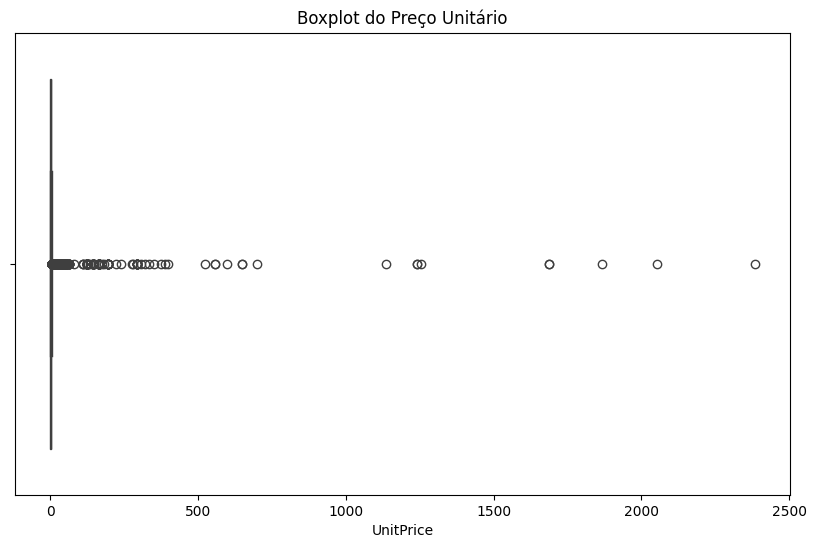

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['UnitPrice'])
plt.title('Boxplot do Preço Unitário')
plt.show()

In [ ]:
# Removendo outliers extremos

df_filtrado = df_filtrado[(df_filtrado['Quantity'] <= 10000) & (df_filtrado['UnitPrice'] <= 5000)]

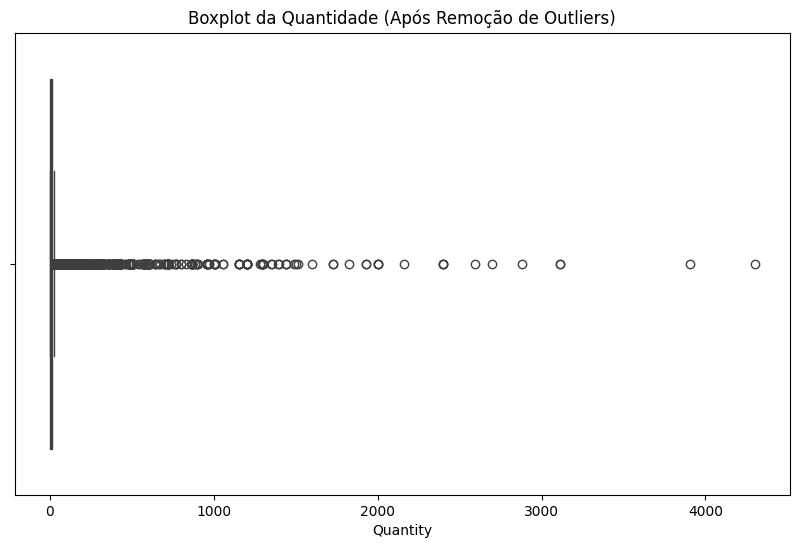

In [ ]:
# Visualizando os dados após a remoção dos outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['Quantity'])
plt.title('Boxplot da Quantidade (Após Remoção de Outliers)')
plt.show()

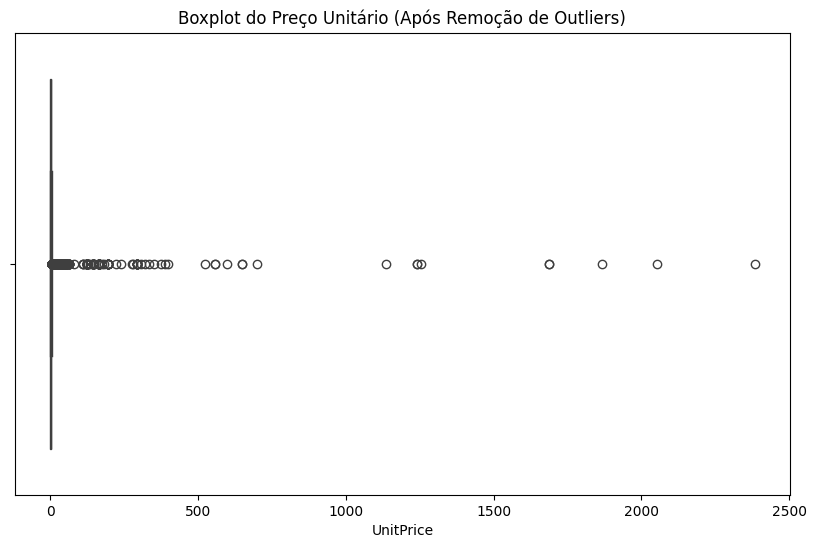

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['UnitPrice'])
plt.title('Boxplot do Preço Unitário (Após Remoção de Outliers)')
plt.show()


#07 - Criando uma coluna adicional


In [ ]:
# Crie uma nova coluna 'TotalPreço' que é o produto de 'Quantity' e 'UnitPrice'

df_filtrado['TotalPreço'] = df_filtrado['Quantity'] * df_filtrado['UnitPrice']
df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPreço,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
250774,559050,23119,PACK OF 6 LARGE FRUIT STRAWS,288,2011-07-05 16:08:00,0.53,13694.0,United Kingdom,152.64,2011-07
250775,559050,23302,KNEELING MAT HOUSEWORK DESIGN,48,2011-07-05 16:08:00,1.45,13694.0,United Kingdom,69.60,2011-07
250776,559050,23309,SET OF 60 I LOVE LONDON CAKE CASES,120,2011-07-05 16:08:00,0.42,13694.0,United Kingdom,50.40,2011-07
250777,559050,21395,BLUE POLKADOT BEAKER,48,2011-07-05 16:08:00,0.39,13694.0,United Kingdom,18.72,2011-07


# 08 - Última data

In [ ]:
# Calculando a data da última compra

ultima_compra = df_filtrado['InvoiceDate'].max()
print(ultima_compra)

2011-07-05 16:08:00


# 09 - Plotando gráficos

In [ ]:
# Agrupe os dados por país e some o TotalPreço

vendas_por_pais = df_filtrado.groupby('Country')['TotalPreço'].sum().sort_values(ascending=False)

In [ ]:
 # Selecione os 10 países com maior valor em vendas

top_10_paises = vendas_por_pais.head(10)

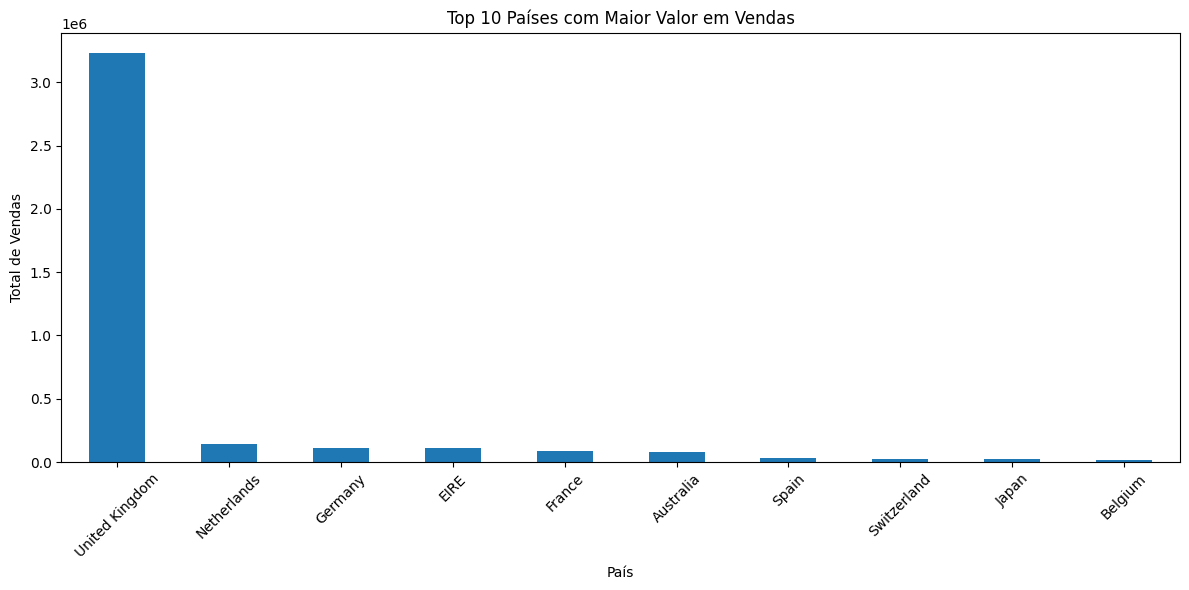

In [ ]:
# Gráfico de barras

plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Agrupe os dados por descrição do produto e some a quantidade

produtos_mais_vendidos = df_filtrado.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [ ]:
# Selecione os 10 produtos mais vendidos
top_10_produtos = produtos_mais_vendidos.head(10)

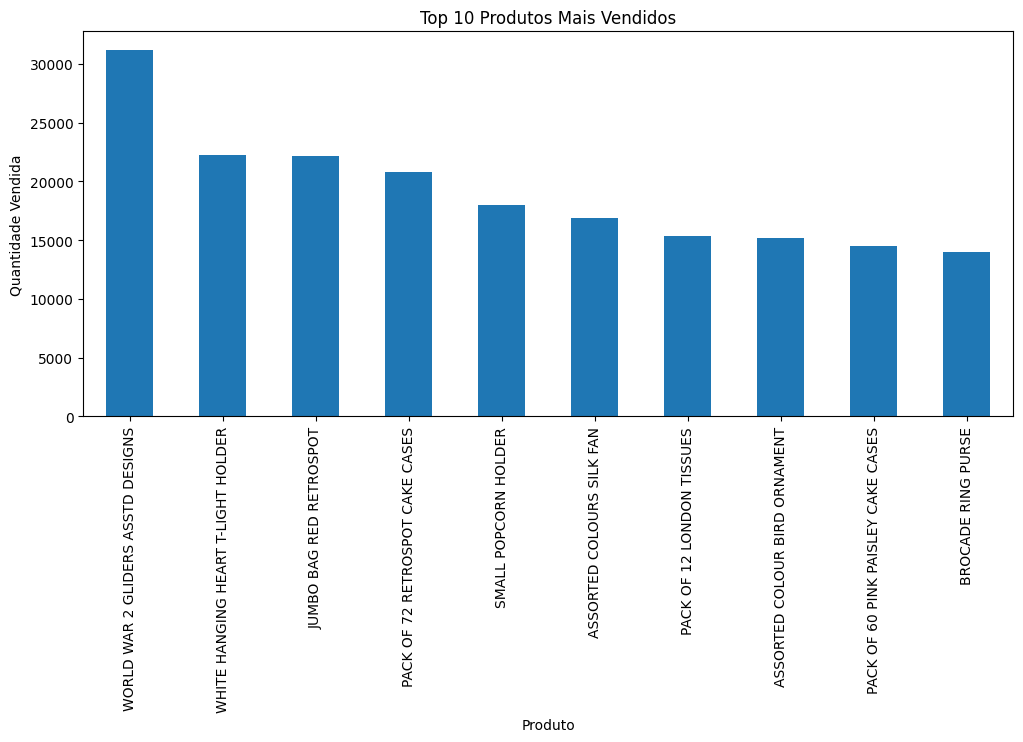

In [ ]:
# Crie o gráfico de barras

plt.figure(figsize=(12, 5))
top_10_produtos.plot(kind='bar')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()


In [ ]:
# Extraia o mês da coluna 'InvoiceDate'
df_filtrado['Month'] = df_filtrado['InvoiceDate'].str.slice(0, 7)

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Agrupe os dados por mês e calcule a soma do 'TotalPreço'
vendas_por_mes = df_filtrado.groupby('Month')['TotalPreço'].sum()

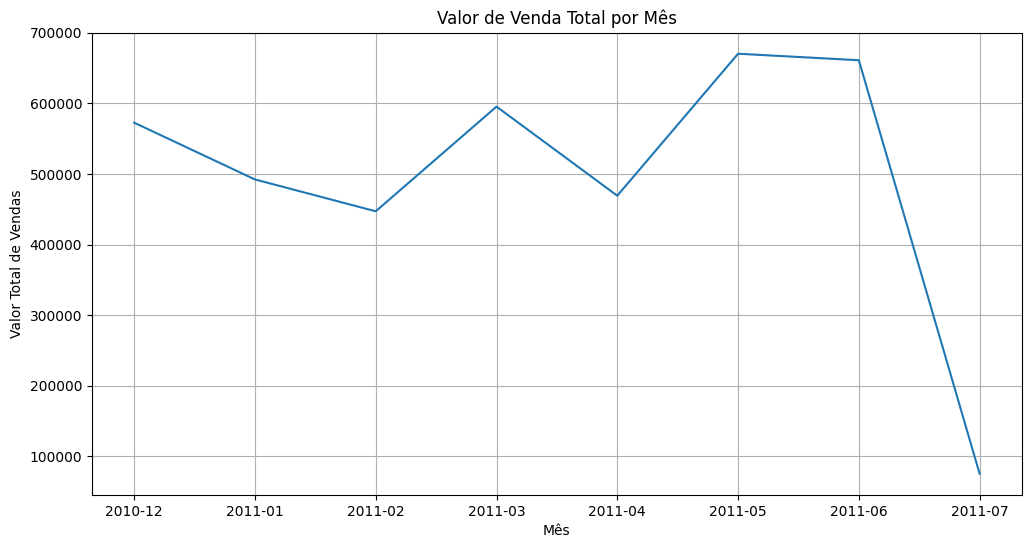

In [ ]:
# Gráfico de linha

plt.figure(figsize=(12, 6))
vendas_por_mes.plot(kind='line')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.grid(True)
plt.show()


In [ ]:
# Agrupar os dados por país, mês e calcule a soma do 'TotalPreço'

vendas_por_pais_mes = df_filtrado.groupby(['Country', 'Month'])['TotalPreço'].sum().reset_index()

In [ ]:
# Selecione os 10 países com maior valor em vendas
top_10_paises = df_filtrado.groupby('Country')['TotalPreço'].sum().sort_values(ascending=False).head(10).index

In [ ]:
# Filtre os dados para incluir apenas os top 10 países
vendas_top_10_paises = vendas_por_pais_mes[vendas_por_pais_mes['Country'].isin(top_10_paises)]

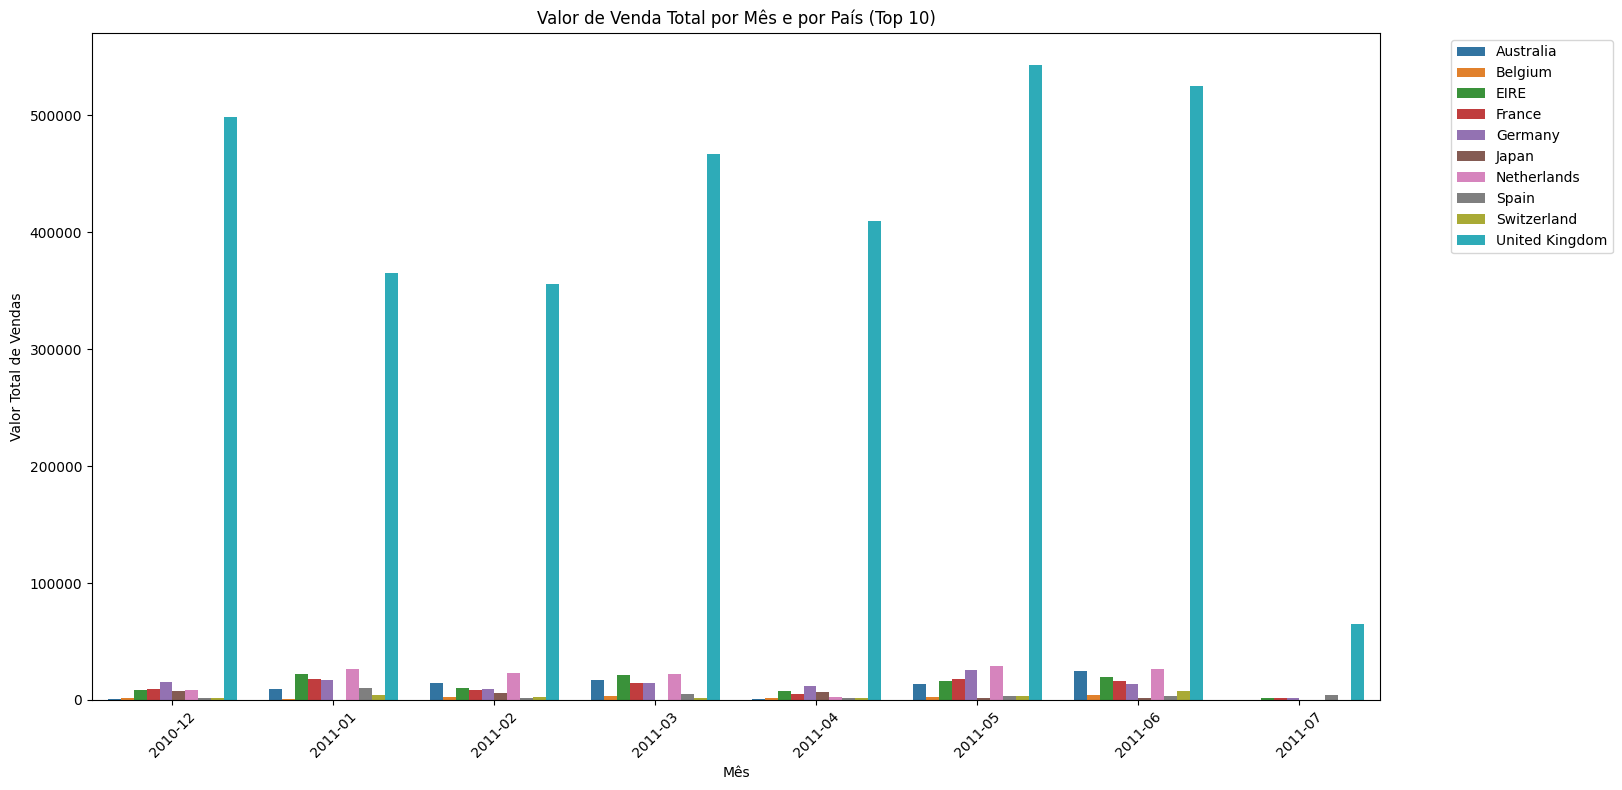

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=vendas_top_10_paises, x='Month', y='TotalPreço', hue='Country')
plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [ ]:
print(df_filtrado)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
250774    559050     23119         PACK OF 6 LARGE FRUIT STRAWS       288   
250775    559050     23302       KNEELING MAT HOUSEWORK  DESIGN        48   
250776    559050     23309   SET OF 60 I LOVE LONDON CAKE CASES       120   
250777    559050     21395                 BLUE POLKADOT BEAKER        48   
250778    559050     22089        PAPER BUNTING VINTAGE PAISLEY        40   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPre

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175795 entries, 0 to 250778
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    175795 non-null  object        
 1   StockCode    175795 non-null  object        
 2   Description  175795 non-null  object        
 3   Quantity     175795 non-null  int64         
 4   InvoiceDate  173776 non-null  datetime64[ns]
 5   UnitPrice    175795 non-null  float64       
 6   CustomerID   175795 non-null  float64       
 7   Country      175795 non-null  object        
 8   TotalPreço   175795 non-null  float64       
 9   Month        175795 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 14.8+ MB


In [ ]:
# Data de referência para cálculo da recência(última data no dataset)

data_referencia = df_filtrado['InvoiceDate'].max()

In [ ]:
# Recência: Dias desde a última compra

recencia = df_filtrado.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data_referencia - x.max()).days}).reset_index()
recencia.columns = ['CustomerID', 'Recencia']

In [ ]:
# Frequência: Nùmero de compras

frequencia = df_filtrado.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']

In [ ]:
# Tiket Médio: Valor médio gasto por compra

valor_gasto = df_filtrado.groupby('CustomerID').agg({'TotalPreço': 'mean'}).reset_index()
valor_gasto.columns = ['CustomerID', 'valor_gasto']

In [ ]:
# Unindo os três indicadores em um único DataFrame

rfm = recencia.merge(frequencia, on='CustomerID').merge(valor_gasto, on='CustomerID')

In [ ]:
print(rfm)

      CustomerID  Recencia  Frequencia  valor_gasto
0        12347.0        26         102    21.626961
1        12348.0        91          28    53.115714
2        12350.0       153          17    19.670588
3        12352.0       105          38    41.100263
4        12353.0        46           4    22.250000
...          ...       ...         ...          ...
2978     18273.0       100           1    51.000000
2979     18280.0       120          10    18.060000
2980     18281.0        23           7    11.545714
2981     18283.0        11         343     2.456501
2982     18287.0        44          29    26.388966

[2983 rows x 4 columns]
